In [1643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuiton I have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.

In [1644]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


Below is plot of all variables

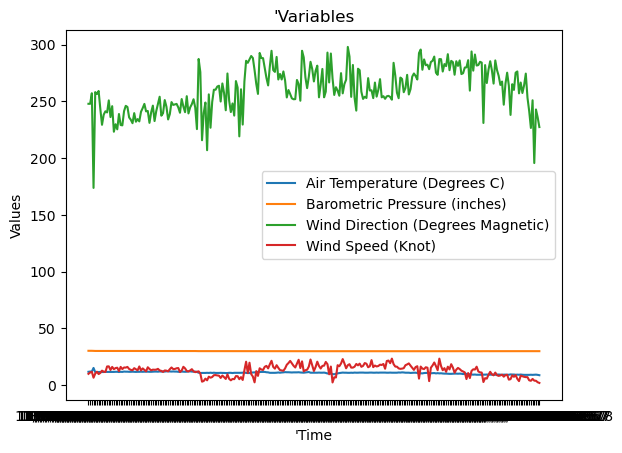

In [1645]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

creating new data frame to convert variable SensorTimestamp to dtype: datetime64

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [1646]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [1647]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [1648]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [1649]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [1650]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


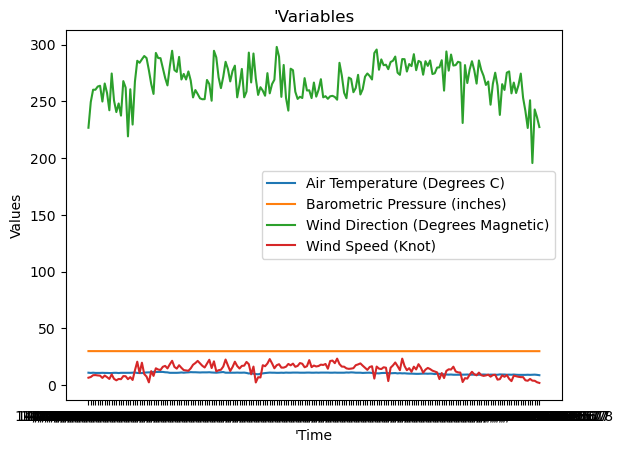

In [1651]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

In [1652]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


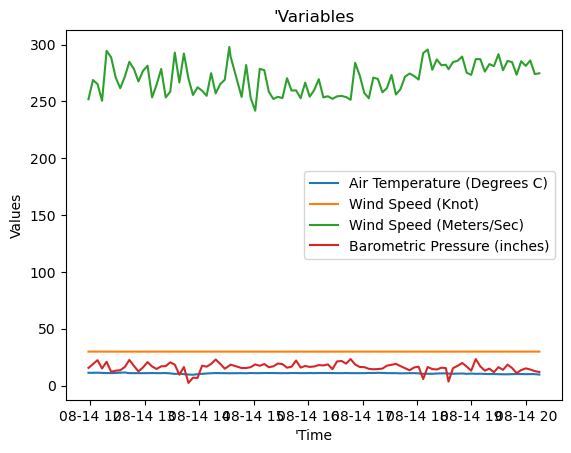

In [1653]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model.

In [1654]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


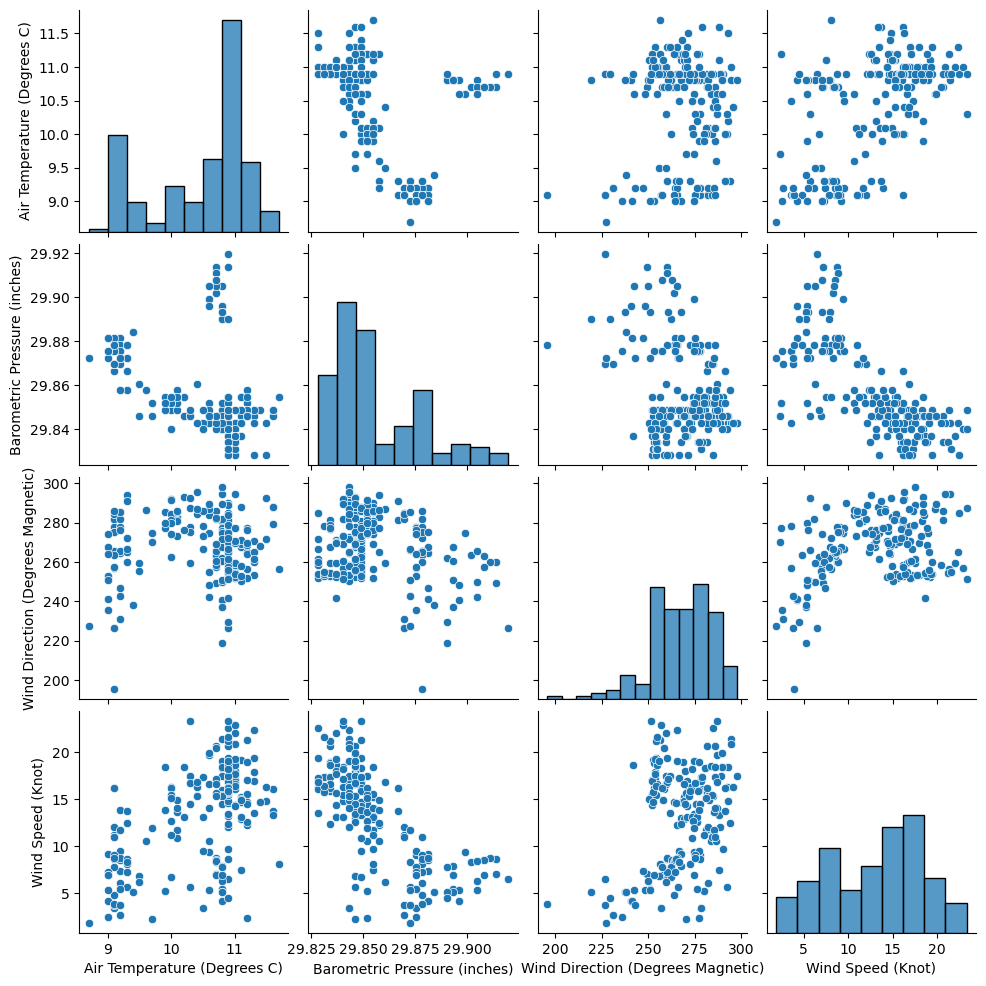

In [1655]:
sns.pairplot(df3)
plt.show()

In [1656]:
#df3.mode('Air Temperature (Degrees C)')

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

In [1657]:
#df3

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

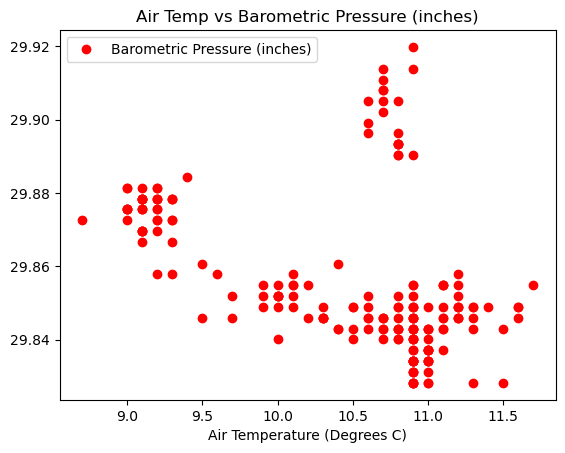

In [1658]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

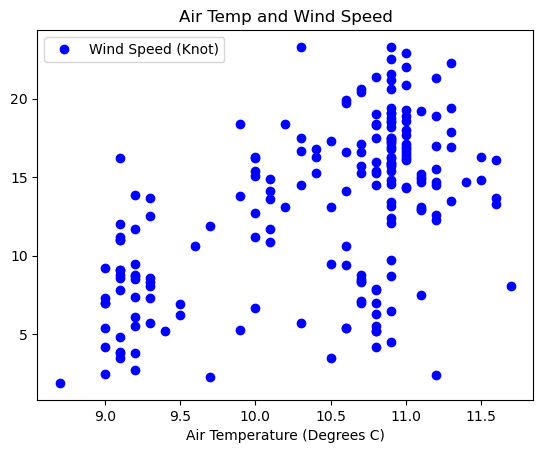

In [1659]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable using .dtypes command

In [1660]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

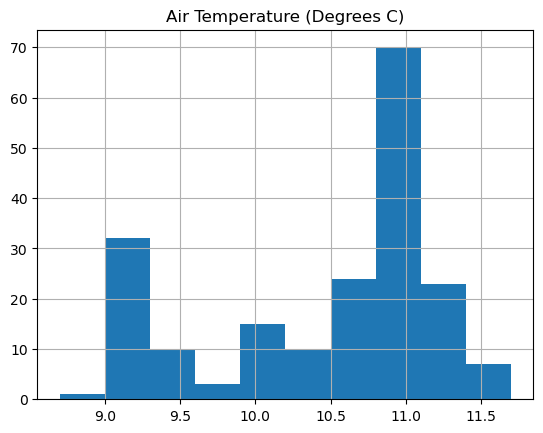

In [1661]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [1662]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               '2023-11-08 00:10:33', '2023-11-08 00:11:33',
               '2023-11-08 00:12:33', '2023-11-08 00:13:33',
               '2023-11-08 00:14:33', '2023-11-08 00:15:33',
               '2023-11-08 00:16:33', '2023-11-08 00:17:33',
               '2023-11-08 00:18:33', '2023-11-08 00:19:33',
               '2023-11-08 00:20:33', '2023-11-08 00:21:33',
               '2023-11-08 00:22:33', '2023-11-08 00:23:33',
               '2023-11-08 00:24:33', '2023-11-08 00:25:33',
               '2023-11-08 00:26:33', '2023-11-08 00:27:33',
               '2023-11-08 00:28:33', '2023-11-08 00:29:33',
               '2023-11-08 00:30:33', '2023-11-08 00:31:33',
               '2023-11-

#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

In [1663]:
# Define the dataset

data = np.loadtxt('data.csv')

# Calculate the mode
mode = statistics.mode(data)

# Print the mode
print("The mode of the dataset is:", mode)

The mode of the dataset is: 10.9


In [1664]:
# Define the left, mode, and right parameters
left = 8.7
mode = 10.9
right = 11.7
np.random.seed(4)

# Generate a random sample of size 1000 from the triangular distribution
d3 = np.random.triangular(left, mode, right, size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

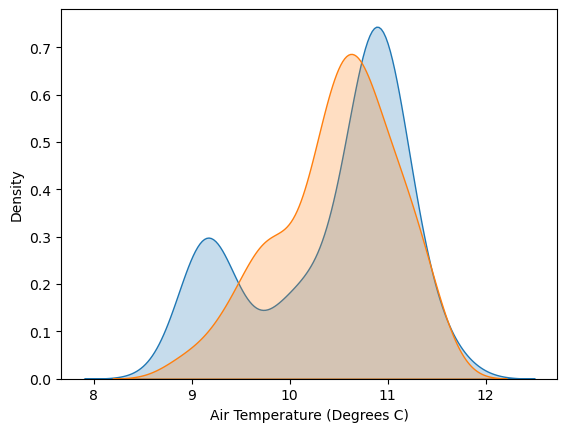

In [1665]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((d3),shade=True)

###Wind Direction (Degrees Magnetic)
mean and std dev info from .describe above.

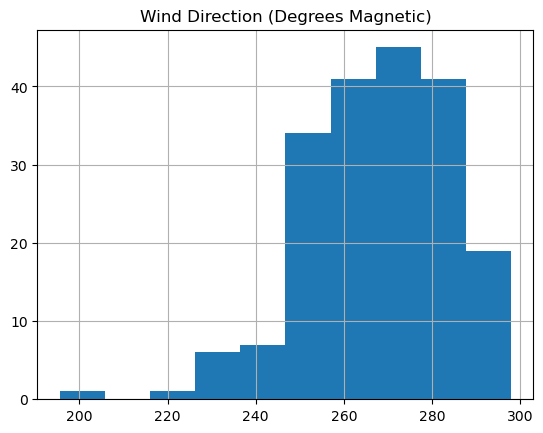

In [1666]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [1667]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,225.458178
2023-11-08 00:01:33,277.348280
2023-11-08 00:02:33,286.021338
2023-11-08 00:03:33,293.215020
2023-11-08 00:04:33,235.618189
...,...
2023-11-08 01:35:33,218.486949
2023-11-08 01:36:33,271.698971
2023-11-08 01:37:33,265.440531
2023-11-08 01:38:33,279.336000


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

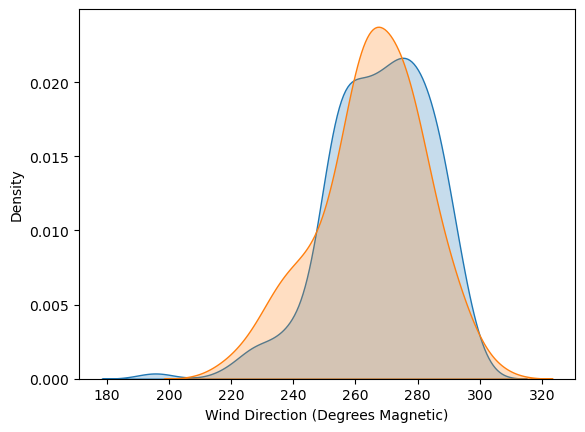

In [1668]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

###Barometric

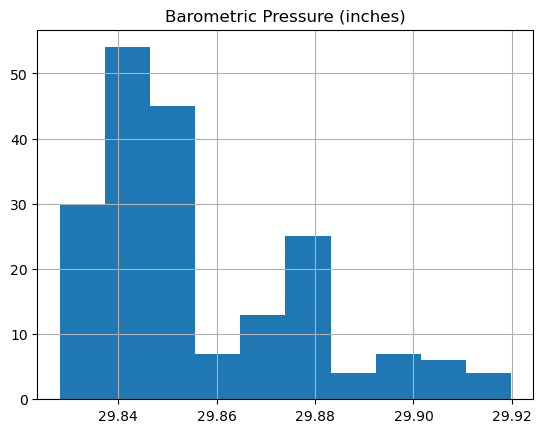

In [1669]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [1670]:
#16
np.random.seed(90)
rng3 = np.random.default_rng()
mu1, sigma1 = 29.8566, 0.0208
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.865355
2023-11-08 00:01:33,29.850793
2023-11-08 00:02:33,29.834757
2023-11-08 00:03:33,29.861863
2023-11-08 00:04:33,29.804983
...,...
2023-11-08 01:35:33,29.857829
2023-11-08 01:36:33,29.844214
2023-11-08 01:37:33,29.831886
2023-11-08 01:38:33,29.828137


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

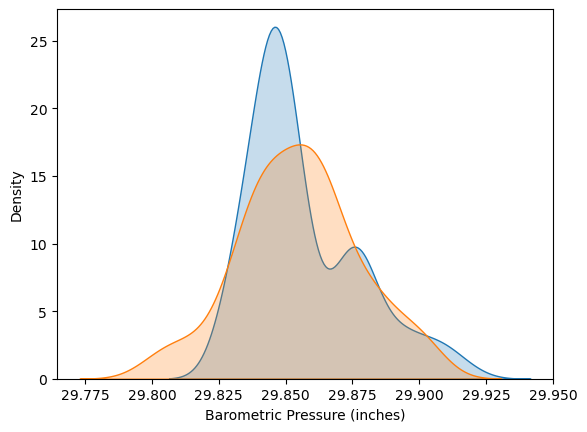

In [1671]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

### wind speed know

In [1672]:
np.random.seed(13)
rng1 = np.random.default_rng()
mu1, sigma1 = 13.04, 5.29
ts101 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised knot'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

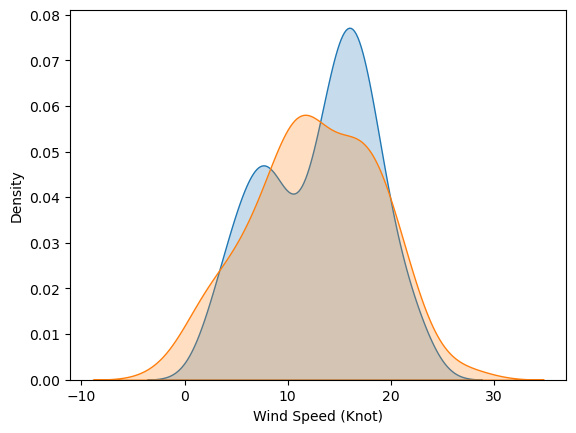

In [1673]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts101['Synthesised knot']),shade=True)

In [2215]:
import random

random.seed(46) # Set the seed
mu, sigma = 0, 0.1 # mean and standard deviation
r = [random.gauss(29.85, .02) for _ in range(100)] # Generate 5 random numbers from a normal 

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

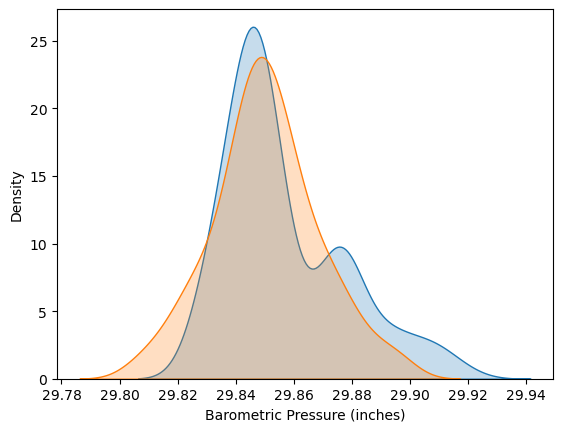

In [2216]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot((r),shade=True)

In [2217]:
#52,56

#import random
seed =123
random.seed(seed) # Set the seed
t = np.random.normal(29.85, .02,100) # Generate 5 random numbers from a normal 
t

array([29.8606128 , 29.87403681, 29.82180619, 29.86201417, 29.84007891,
       29.86705681, 29.8607686 , 29.84965686, 29.86316357, 29.84047137,
       29.83849965, 29.81940233, 29.83454367, 29.85911818, 29.83292972,
       29.86760564, 29.84382253, 29.84847133, 29.84910784, 29.84218087,
       29.88334675, 29.8406784 , 29.84013339, 29.8424787 , 29.83319805,
       29.84719784, 29.84361426, 29.85381381, 29.83019952, 29.84307257,
       29.84608319, 29.85611833, 29.85049774, 29.87660496, 29.84573293,
       29.87260403, 29.86904212, 29.82646777, 29.8666744 , 29.82827803,
       29.82554668, 29.84837642, 29.84160297, 29.84648461, 29.79578924,
       29.79701219, 29.85484676, 29.84968548, 29.89479893, 29.84943476,
       29.85034647, 29.84934339, 29.839268  , 29.85764259, 29.88785301,
       29.82896475, 29.84861338, 29.8567163 , 29.87051531, 29.86970215,
       29.87683534, 29.82799364, 29.85564244, 29.85433421, 29.84255648,
       29.83083908, 29.81765232, 29.83691795, 29.84587373, 29.82

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

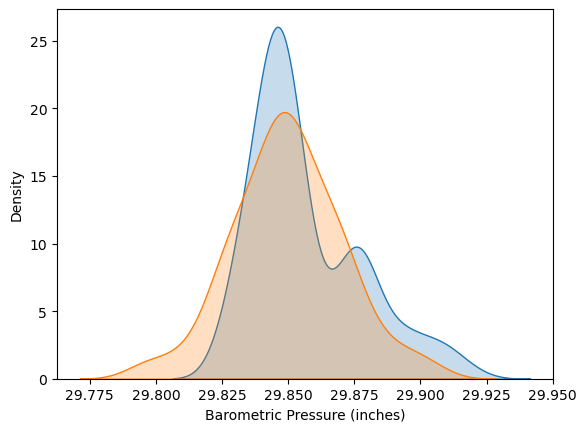

In [2218]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot((t),shade=True)

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()


In [2219]:
x1 = np.random.normal(13.04,5.29,100)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

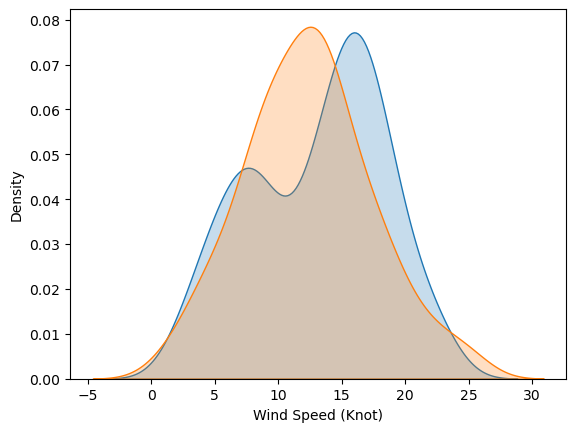

In [2220]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((x1),shade=True)


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

##Uniform Dsitribution

In [2221]:
s4 = np.random.uniform(8.7,11.3,100)



<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

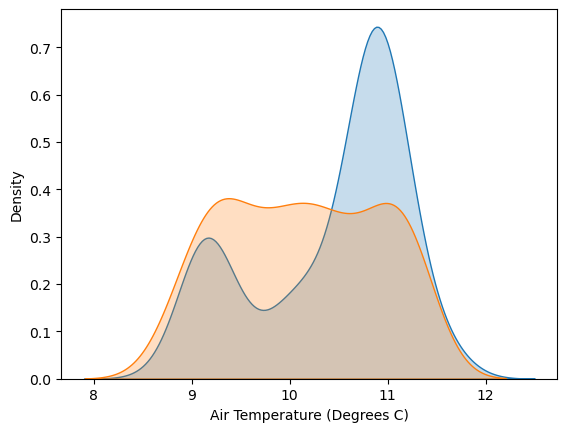

In [2222]:

sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s4),shade=True)

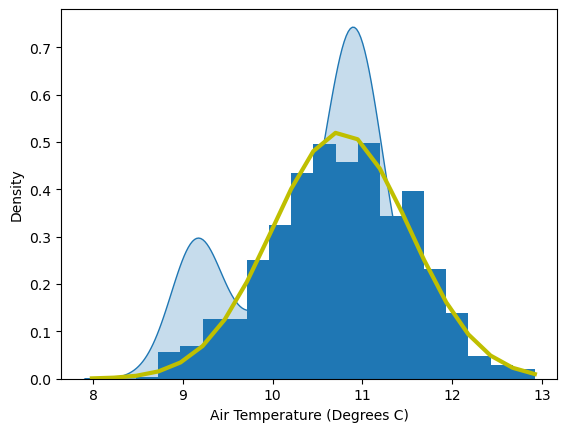

In [2223]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [2224]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

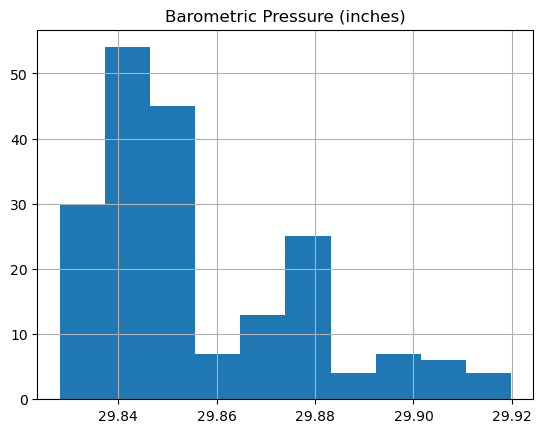

In [2225]:
df3.hist('Barometric Pressure (inches)')
plt.show()

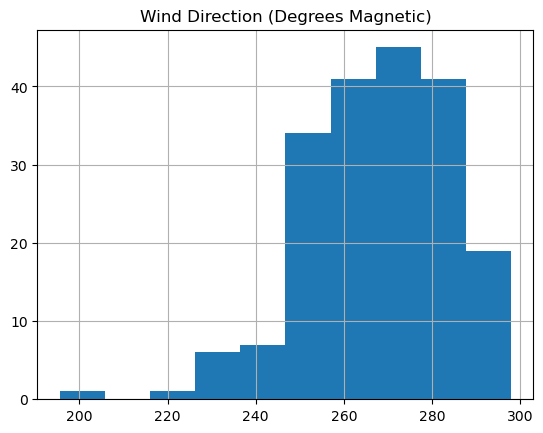

In [2226]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

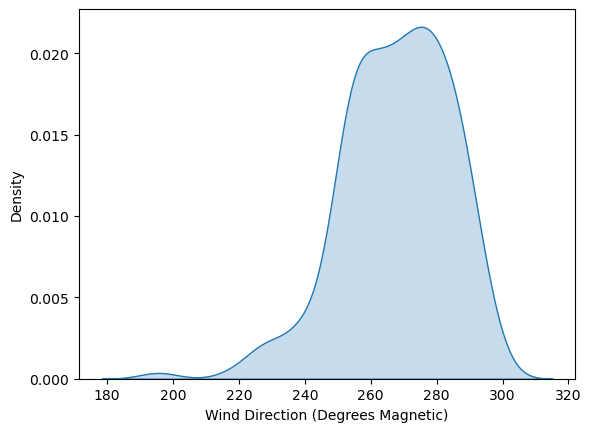

In [2227]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [2228]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [2229]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [2230]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

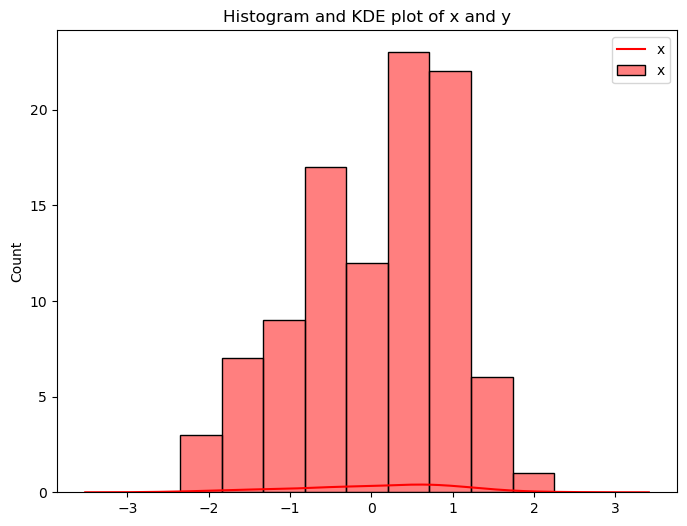

In [2231]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [2232]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [2233]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,282.428889
2023-11-08 00:01:33,288.350308
2023-11-08 00:02:33,240.797123
2023-11-08 00:03:33,277.822981
2023-11-08 00:04:33,270.030876
...,...
2023-11-08 01:35:33,258.956050
2023-11-08 01:36:33,306.424694
2023-11-08 01:37:33,286.054798
2023-11-08 01:38:33,263.039272


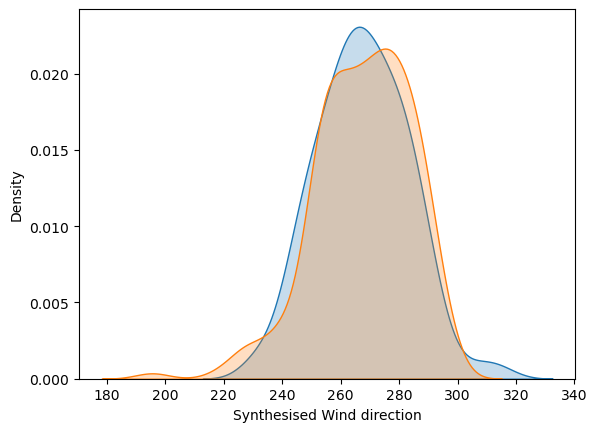

In [2234]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [2235]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

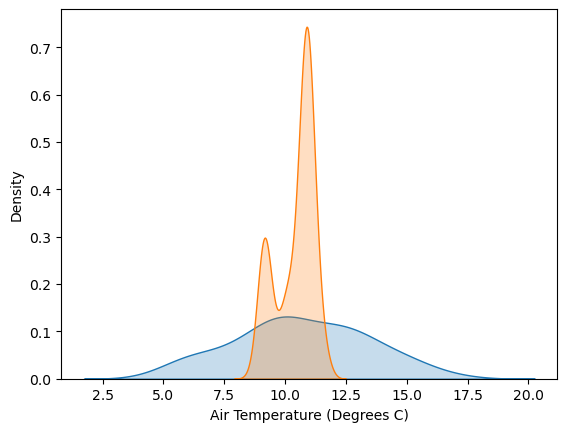

In [2236]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [2237]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

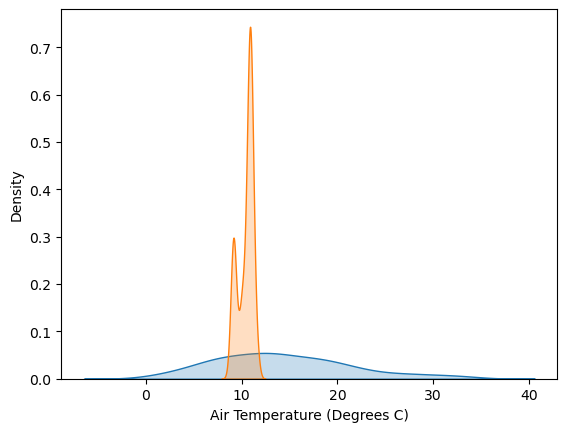

In [2238]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [2239]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

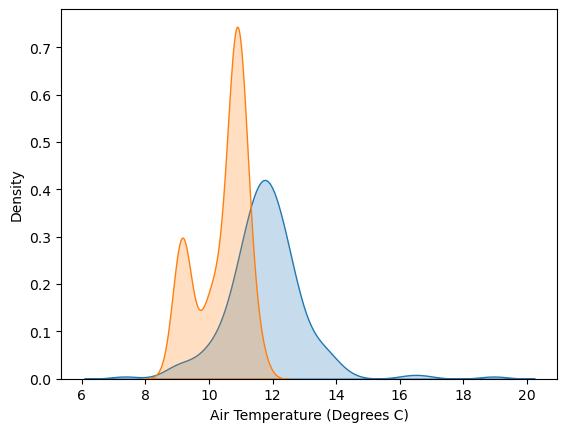

In [2240]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [2241]:
#result=pd.concat([ts1,ts2,ts3,ts4])
#result

In [2242]:
from scipy.stats import johnsonsu

# Load your dataset into a NumPy array
data = pd.read_csv('data.csv')

# Fit the Johnson SU distribution to your data
a, b, loc, scale = johnsonsu.fit(data)

# The 'a' and 'b' parameters are now available for use
print('a:', a)
print('b:', b)

a: 1.2011500626388192
b: 1.0081551947944454


In [2243]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[-2.61025300e+00 -3.26904367e+00 -8.48324008e-01 -1.52967927e-01
 -1.23191549e+00 -6.42712665e+00 -1.45917777e+00 -2.71190699e-01
 -4.24667642e-01 -8.79844163e+00  1.75806467e-01  1.55497070e-01
 -1.11888656e+00 -1.37512798e+00 -3.15473618e-01 -2.49776370e-01
 -1.83705899e+00 -7.00639051e+00  3.45200957e-01 -1.96803407e+00
  5.73827895e-02 -1.33989985e+00 -7.34657072e+00 -1.81898135e+00
 -1.49245528e+00  5.30867753e-01 -1.74674352e+00 -3.61078958e+00
 -1.66239906e+00 -2.51803071e+00 -5.05871828e-01 -6.68342406e+00
 -3.77394891e-01 -5.09836116e+00 -7.24220191e-01 -8.06832133e-03
 -6.54451105e-01  3.12204461e-01 -4.51539374e+00 -9.63629657e-01
  3.11029057e-01 -1.11211695e+00 -9.54104600e+00 -5.67345134e+00
 -7.88455526e-01 -3.78366436e-01 -3.26299159e+00 -2.39228492e+00
 -3.94578521e-01 -1.10124086e+00 -7.91284059e-01 -2.21038540e+00
 -4.60033590e+01 -1.10630147e+00 -5.69747890e-01 -3.19013386e+00
 -6.05399489e+00 -3.57288480e-01 -9.99075303e+00 -1.20159767e+00
 -1.32671176e+00  7.44939

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

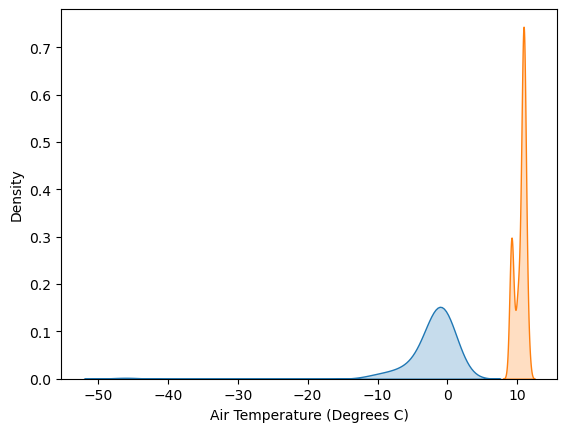

In [2244]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

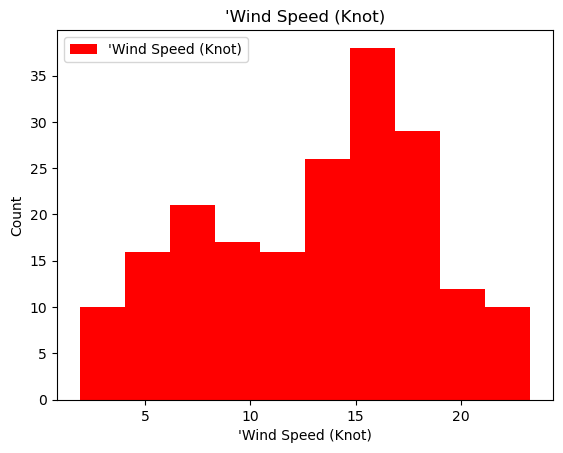

In [2245]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

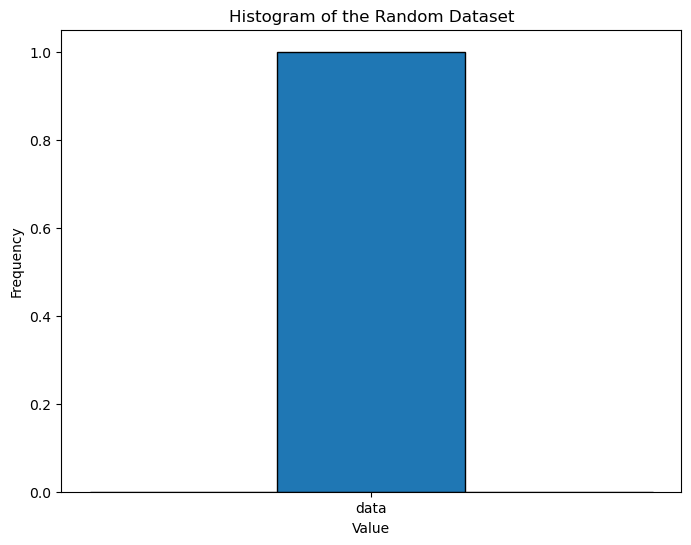

In [2246]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [2247]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

1.8138973091594872 0 23.90074766105487


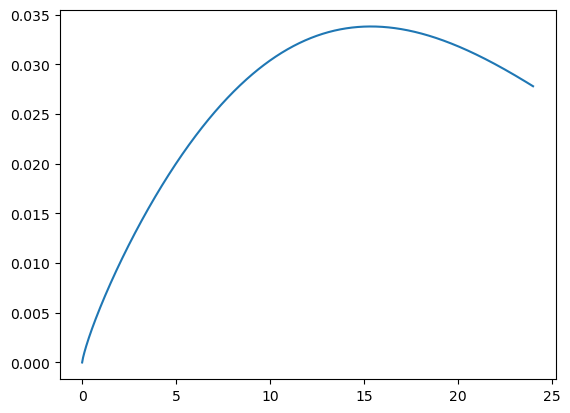

In [2248]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

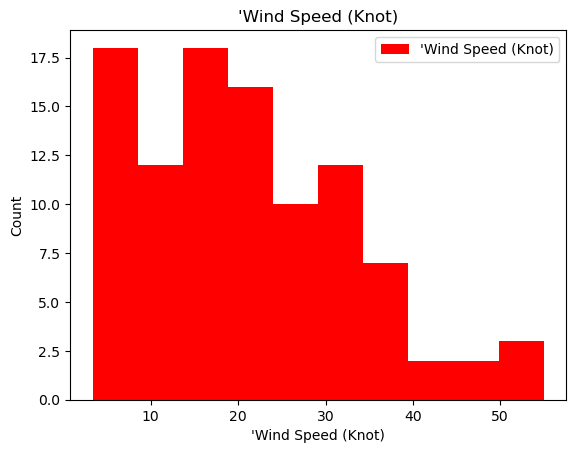

In [2249]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

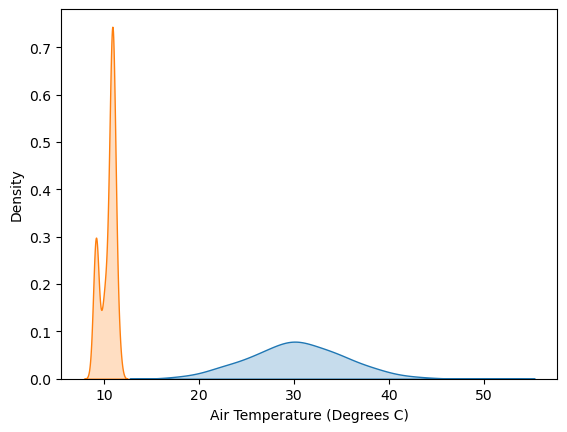

In [2250]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

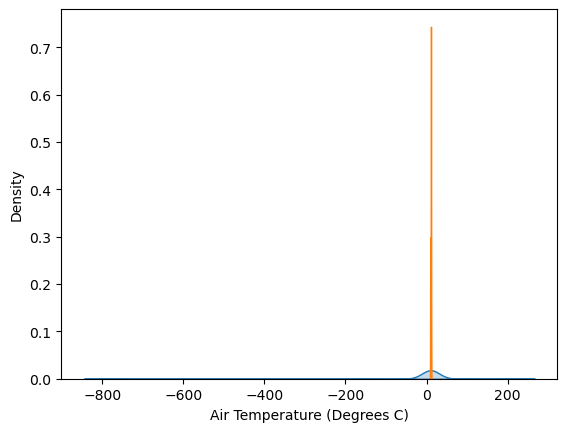

In [2251]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

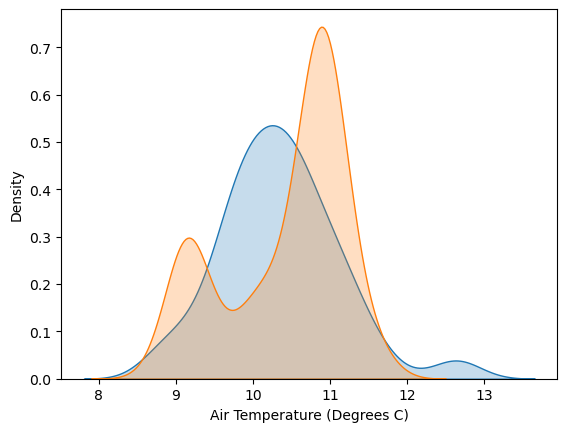

In [2252]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 10.42
std_dev = 0.766

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

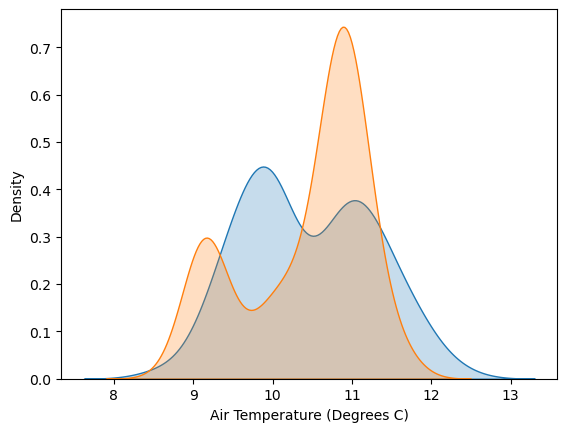

In [2253]:
import numpy as np
from scipy.stats import dweibull
mean = 10.4225
std_dev = 0.7669

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


Rayleigh PDF 

In [2254]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

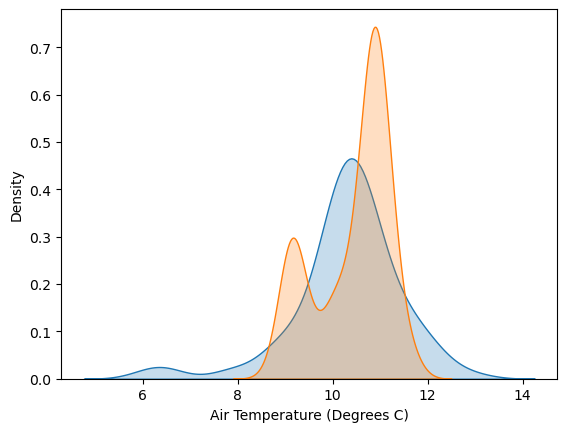

In [2255]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [2256]:
# Load the dataset
data = np.loadtxt('data.csv')

# Calculate the mean and variance of the dataset
mean = np.mean(data)
variance = np.var(data)

# Calculate the shape and scale parameters of the standard gamma distribution
k = (mean / variance) ** 2
theta = variance / mean

# Print the shape and scale parameters
print('Shape parameter (k) =', k)
print('Scale parameter (theta) =', theta)

Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406
